In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
df = pd.read_excel('Url_Classification.xlsx')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


# **Data Understanding**

In [13]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

### **Column Selection**

In [15]:
# Example classification (assuming df is your DataFrame)
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns.tolist()
text_cols = df.select_dtypes(include=['object']).columns.tolist()

# Separate numerical and text data
X_numerical = df[numerical_cols]
X_text = df[text_cols]

# Check the shapes of the numerical and text data
print("Shape of numerical data:", X_numerical.shape)
print("Shape of text data:", X_text.shape)


Shape of numerical data: (235795, 51)
Shape of text data: (235795, 5)


In [16]:
# # Combine text columns into a single series
# text_data = df[text_cols].astype(str).agg(' '.join, axis=1)

# # Check the shape of the combined text data
# print("Combined text data shape:", text_data.shape)


In [17]:
# #Standardizing numerical columns
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_numerical_scaled = scaler.fit_transform(df[numerical_cols])
# print("Shape of numerical data", X_numerical_scaled.shape)

In [18]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize the TF-IDF Vectorizer
# tfidf = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

# # Fit and transform the combined text data
# X_text_tfidf = tfidf.fit_transform(text_data)

# # Check the shape of the TF-IDF output
# print("Shape of text data (TF-IDF):", X_text_tfidf.shape)


In [19]:
# print("Shape of scaled numerical data:", X_numerical_scaled.shape)
# print("Shape of text data (TF-IDF):", X_text_tfidf.shape)


In [20]:
# from scipy.sparse import hstack
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# # Assuming 'label' is your target variable in the DataFrame
# y = df['label'].values  # Extract target variable

# # Combine numerical and text data if not already done
# X_combined = hstack([X_numerical_scaled, X_text_tfidf]).toarray()
# all_columns = numerical_cols + [f'TF-IDF_{i}' for i in range(X_text_tfidf.shape[1])]
# print(len(all_columns))

In [21]:
# # Fit a Random Forest model
# rf_model = RandomForestClassifier()
# rf_model.fit(X_combined, y)

# # Get feature importances
# feature_importances = rf_model.feature_importances_

# # Debugging: Print the shapes and lengths
# print("Number of features in the model:", len(feature_importances))
# print("Number of columns in all_columns:", len(all_columns))

# # Sort features by importance
# important_indices = np.argsort(feature_importances)[::-1]

# # Limit to the length of all_columns
# top_n = min(len(all_columns), 25)  # Limit to 25 features
# top_features = [all_columns[i] for i in important_indices[:top_n]]  # Top N features
# print("Top features:", top_features)


In [22]:
# import matplotlib.pyplot as plt

# # Get the top feature importances
# top_indices = important_indices[:top_n]
# top_importances = feature_importances[top_indices]

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.barh(range(len(top_importances)), top_importances, align='center')
# plt.yticks(range(len(top_importances)), [all_columns[i] for i in top_indices])
# plt.xlabel('Feature Importance')
# plt.title('Top Features by Importance')
# plt.show()


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and y is your target variable
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Assuming 'label' is your target variable
target_correlation = correlation_matrix['label'].drop('label').abs().sort_values(ascending=False)

# Get the top 25 features with the highest correlation
top_25_features = target_correlation.head(25)


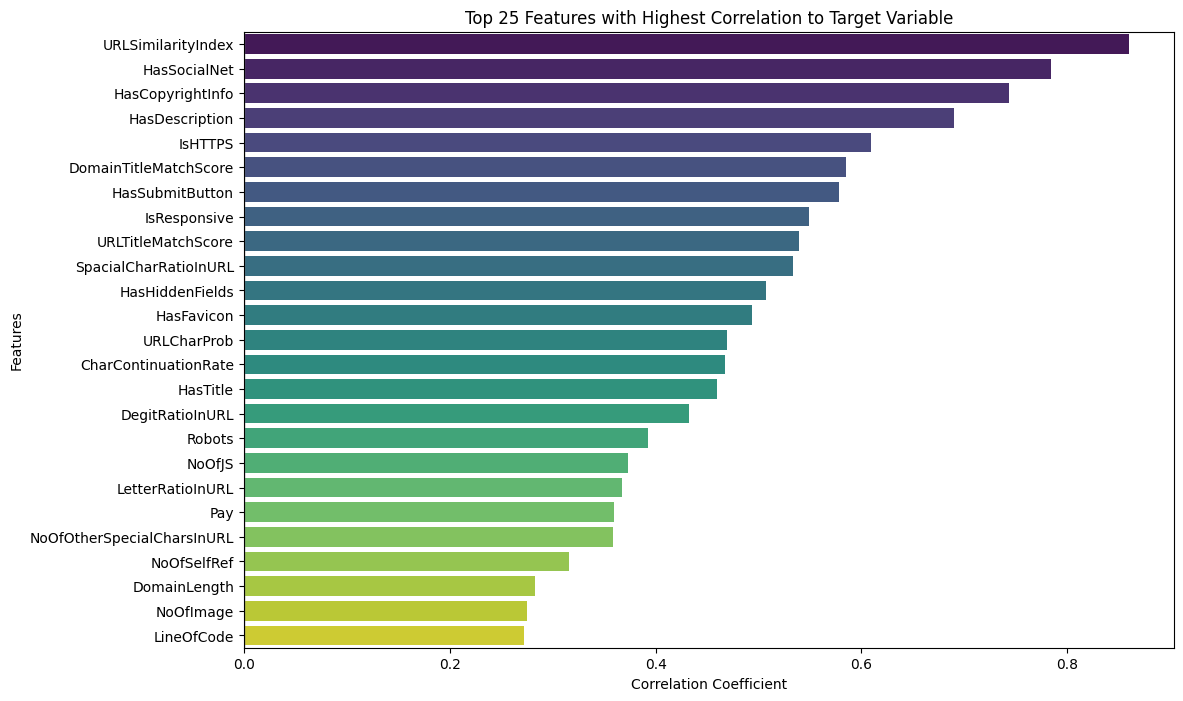

In [24]:
# Bar plot for the top 25 features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_features.values, y=top_25_features.index, palette='viridis')
plt.title('Top 25 Features with Highest Correlation to Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='grey', lw=1)
plt.show()


In [25]:
# import warnings
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Suppress warnings
# warnings.filterwarnings('ignore')

# # Create a figure with 2 subplots
# fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# # Bar plot for the top 25 features with highest correlation (inverted)
# sns.barplot(x=top_25_features.values, y=top_25_features.index, palette='viridis', ax=axes[0])
# axes[0].set_title('Top 25 Features with Highest Correlation to Target Variable')
# axes[0].set_xlabel('Correlation Coefficient')
# axes[0].set_ylabel('Features')
# axes[0].axvline(0, color='grey', lw=1)
# axes[0].invert_yaxis()  # Invert y-axis for the correlation plot ONLY

# # Get the top feature importances
# top_indices = important_indices[:25]  # Ensure we are getting the top 25 for consistency
# top_importances = feature_importances[top_indices]

# # Bar plot for top features by importance (unchanged)
# axes[1].barh(range(len(top_importances)), top_importances, align='center')
# axes[1].set_yticks(range(len(top_importances)))
# axes[1].set_yticklabels([all_columns[i] for i in top_indices])
# axes[1].set_xlabel('Feature Importance')
# axes[1].set_title('Top Features by Importance')

# # Show the plots
# plt.tight_layout()
# plt.show()


In [26]:
corr_df = top_25_features
print(corr_df)


URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
SpacialCharRatioInURL         0.533537
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
DegitRatioInURL               0.432032
Robots                        0.392620
NoOfJS                        0.373500
LetterRatioInURL              0.367794
Pay                           0.359747
NoOfOtherSpecialCharsInURL    0.358891
NoOfSelfRef                   0.316211
DomainLength                  0.283152
NoOfImage                     0.274658
LineOfCode                    0.272257
Name: label, dtype: float

In [27]:
# import numpy as np

# # Get the top feature indices based on importance
# top_n = 25  # Specify the number of top features you want to extract
# top_indices = important_indices[:top_n]  # Get the indices of the top N features

# # Extract the corresponding feature names from 'all_columns'
# top_features_list = [all_columns[i] for i in top_indices]

# # Print the top features
# print("Top {} Features by Importance:".format(top_n))
# for i, feature in enumerate(top_features_list, 1):
#     print(f"{i}. {feature}")

# # If you want to return the list of top features
# top_features_list

# rndforest_df = top_features_list

In [28]:
print(corr_df)

URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
SpacialCharRatioInURL         0.533537
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
DegitRatioInURL               0.432032
Robots                        0.392620
NoOfJS                        0.373500
LetterRatioInURL              0.367794
Pay                           0.359747
NoOfOtherSpecialCharsInURL    0.358891
NoOfSelfRef                   0.316211
DomainLength                  0.283152
NoOfImage                     0.274658
LineOfCode                    0.272257
Name: label, dtype: float

In [29]:
# print(rndforest_df)

# **Training using the columns with the highest correlation**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [31]:
from sklearn.model_selection import train_test_split
selected_features = [
    'label',
    'URLSimilarityIndex',
    'HasSocialNet',
    'HasCopyrightInfo',
    'HasDescription',
    'IsHTTPS',
    'DomainTitleMatchScore',
    'HasSubmitButton',
    'IsResponsive',
    'URLTitleMatchScore',
    'SpacialCharRatioInURL',
    'HasHiddenFields',
    'HasFavicon',
    'URLCharProb',
    'CharContinuationRate',
    'HasTitle',
    'DegitRatioInURL',
    'Robots',
    'NoOfJS',
    'LetterRatioInURL',
    'Pay',
    'NoOfOtherSpecialCharsInURL',
    'NoOfSelfRef',
    'DomainLength',
    'NoOfImage',
    'LineOfCode'
]

# # Split the data into features (X) and target (y)
# X_corr = df[selected_features]
# y_corr = df['label']  # Replace 'Label' with your actual target variable column name

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.2, random_state=42)


In [32]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import xgboost as xgb
# import lightgbm as lgb

# # Dictionary of models to evaluate
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
#     'LightGBM': lgb.LGBMClassifier(random_state=42)
# }

# # Evaluate models
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)

#     print(f"Model: {name}")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print("Confusion Matrix:")
#     print(cm)
#     print("\n" + "="*50 + "\n")  # Separator for clarity


# **Pre-Processing**

In [33]:
df[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   label                       235795 non-null  int64  
 1   URLSimilarityIndex          235795 non-null  float64
 2   HasSocialNet                235795 non-null  int64  
 3   HasCopyrightInfo            235795 non-null  int64  
 4   HasDescription              235795 non-null  int64  
 5   IsHTTPS                     235795 non-null  int64  
 6   DomainTitleMatchScore       235795 non-null  float64
 7   HasSubmitButton             235795 non-null  int64  
 8   IsResponsive                235795 non-null  int64  
 9   URLTitleMatchScore          235795 non-null  float64
 10  SpacialCharRatioInURL       235795 non-null  float64
 11  HasHiddenFields             235795 non-null  int64  
 12  HasFavicon                  235795 non-null  int64  
 13  URLCharProb   

In [34]:
df_filtered = df[selected_features]
df_filtered.head()

,label,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,HasDescription,IsHTTPS,DomainTitleMatchScore,HasSubmitButton,IsResponsive,URLTitleMatchScore,...,DegitRatioInURL,Robots,NoOfJS,LetterRatioInURL,Pay,NoOfOtherSpecialCharsInURL,NoOfSelfRef,DomainLength,NoOfImage,LineOfCode
0,1,100.0,0,1,0,1,0.000000,1,1,0.000000,...,0.0,1,28,0.581,0,1,119,24,34,558
1,1,100.0,1,1,0,1,55.555556,1,0,55.555556,...,0.0,1,8,0.391,0,2,39,16,50,618
2,1,100.0,0,1,1,1,46.666667,1,1,46.666667,...,0.0,1,7,0.517,0,2,42,22,10,467
3,1,100.0,1,1,0,1,0.000000,1,1,0.000000,...,0.0,1,15,0.500,1,1,22,19,3,6356
4,1,100.0,1,1,1,1,100.000000,1,1,100.000000,...,0.0,1,34,0.606,1,1,72,26,244,6089


In [35]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_filtered = scaler.fit_transform(df_filtered)
df_filtered = pd.DataFrame(df_filtered, columns=selected_features)
df_filtered.head()

,label,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,HasDescription,IsHTTPS,DomainTitleMatchScore,HasSubmitButton,IsResponsive,URLTitleMatchScore,...,DegitRatioInURL,Robots,NoOfJS,LetterRatioInURL,Pay,NoOfOtherSpecialCharsInURL,NoOfSelfRef,DomainLength,NoOfImage,LineOfCode
0,0.865201,0.744382,-0.916605,1.02681,-0.886735,0.527021,-1.009150,1.188994,0.775402,-1.050839,...,-0.403629,1.658846,0.783327,0.527550,-0.557340,-0.379918,0.305222,0.276436,0.099788,-0.170734
1,0.865201,0.744382,1.090983,1.02681,-0.886735,0.527021,0.109188,1.188994,-1.289654,0.069222,...,-0.403629,1.658846,-0.113046,-1.013227,-0.557340,-0.096439,-0.147555,-0.597807,0.301270,-0.153190
2,0.865201,0.744382,-0.916605,1.02681,1.127733,0.527021,-0.069746,1.188994,0.775402,-0.109988,...,-0.403629,1.658846,-0.157865,0.008551,-0.557340,-0.096439,-0.130576,0.057875,-0.202435,-0.197343
3,0.865201,0.744382,1.090983,1.02681,-0.886735,0.527021,-1.009150,1.188994,0.775402,-1.050839,...,-0.403629,1.658846,0.200684,-0.129308,1.794238,-0.379918,-0.243770,-0.269966,-0.290583,1.524616
4,0.865201,0.744382,1.090983,1.02681,1.127733,0.527021,1.003859,1.188994,0.775402,0.965271,...,-0.403629,1.658846,1.052238,0.730284,1.794238,-0.379918,0.039216,0.494997,2.744236,1.446544


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
normalizer = MinMaxScaler()

# Fit and transform the data
df_filtered = normalizer.fit_transform(df_filtered)
df_filtered = pd.DataFrame(df_filtered, columns=selected_features)
df_filtered.head()

,label,URLSimilarityIndex,HasSocialNet,HasCopyrightInfo,HasDescription,IsHTTPS,DomainTitleMatchScore,HasSubmitButton,IsResponsive,URLTitleMatchScore,...,DegitRatioInURL,Robots,NoOfJS,LetterRatioInURL,Pay,NoOfOtherSpecialCharsInURL,NoOfSelfRef,DomainLength,NoOfImage,LineOfCode
0,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.000000,...,0.0,1.0,0.004025,0.627430,0.0,0.002004,0.004344,0.188679,0.003796,0.001256
1,1.0,1.0,1.0,1.0,0.0,1.0,0.555556,1.0,0.0,0.555556,...,0.0,1.0,0.001150,0.422246,0.0,0.004008,0.001424,0.113208,0.005583,0.001392
2,1.0,1.0,0.0,1.0,1.0,1.0,0.466667,1.0,1.0,0.466667,...,0.0,1.0,0.001006,0.558315,0.0,0.004008,0.001533,0.169811,0.001117,0.001050
3,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.000000,...,0.0,1.0,0.002156,0.539957,1.0,0.002004,0.000803,0.141509,0.000335,0.014354
4,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.0,1.0,0.004887,0.654428,1.0,0.002004,0.002628,0.207547,0.027244,0.013751


In [37]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_filtered.drop(columns=['label'])  # Drop the 'label' column from X
y = df_filtered['label']  # Use 'label' as y

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # Reduced solvers
    'max_iter': [100, 200]            # Lower iteration count
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set using the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Accuracy:", test_score)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


ValueError: 
All the 72 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Data_Science_Projects\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Data_Science_Projects\env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Data_Science_Projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1209, in fit
    check_classification_targets(y)
  File "d:\Data_Science_Projects\env\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Now, separate features and labels
X = normalized_data_df.drop(columns=['label'])  # Drop the 'label' column from X
y = normalized_data_df['label']  # Use 'label' as y

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for XGBoost
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of boosting rounds
    'max_depth': [3, 4, 5],              # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0],        # Fraction of samples used for fitting
    'colsample_bytree': [0.5, 0.7, 1.0]  # Fraction of features used for fitting
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set using the best parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Set Accuracy:", test_score)
